# 1.	Data: https://1drv.ms/u/s!AnEJc3HboyBEwGxZkk_3-Uys7Cz9?e=mihEAR. Merupakan log sensor jumlah pengunjung yang berupa counter dan diambil setiap beberapa menit. Setiap pukul 00:00 counter akan direset ke nilai 0. 
Dari data yg diberikan, buatlah chart trend jumlah pengunjung untuk sensor 265, 271, 277 dan 283: 
a.	Per jam, untuk tanggal 31-08-2020
b.	Per hari dalam rentang tanggal 17-08-2020 s/d 31-08-2020.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('202009020838.csv')
df.head()

,id,timestamp,sensor_id,total
0,68038,8/17/2020 7:51,265,118
1,68039,8/17/2020 7:51,271,247
2,68040,8/17/2020 7:51,277,247
3,68041,8/17/2020 7:51,283,247
4,68042,8/17/2020 7:56,265,119


In [6]:
df.timestamp = pd.to_datetime(df.timestamp,format)

In [12]:
selected = df.loc[(df['sensor_id'] == 265) | (df['sensor_id'] == 271)| (df['sensor_id'] == 277) | (df['sensor_id'] == 283)]
selected.head(10)

,id,timestamp,sensor_id,total
0,68038,2020-08-17 07:51:00,265,118
1,68039,2020-08-17 07:51:00,271,247
2,68040,2020-08-17 07:51:00,277,247
3,68041,2020-08-17 07:51:00,283,247
4,68042,2020-08-17 07:56:00,265,119
5,68043,2020-08-17 07:56:00,271,254
6,68044,2020-08-17 07:56:00,277,254
7,68045,2020-08-17 07:56:00,283,254
8,68046,2020-08-17 08:01:00,265,119
9,68047,2020-08-17 08:01:00,271,260


In [21]:
selected.drop(['id'],axis=1,inplace=True)

In [23]:
selected.head()

,timestamp,sensor_id,total
0,2020-08-17 07:51:00,265,118
1,2020-08-17 07:51:00,271,247
2,2020-08-17 07:51:00,277,247
3,2020-08-17 07:51:00,283,247
4,2020-08-17 07:56:00,265,119


In [29]:
selected.set_index('timestamp',inplace=True)

In [34]:
only_310820 = selected.loc['2020-08-31']
only_277    = only_310820[only_310820['sensor_id']==277]
only_271    = only_310820[only_310820['sensor_id']==271]
only_283    = only_310820[only_310820['sensor_id']==283]
only_265    = only_310820[only_310820['sensor_id']==265]

In [38]:
only_265.head()

,sensor_id,total
timestamp,,
2020-08-31 19:35:00,265,20
2020-08-31 23:25:00,265,0
2020-08-31 12:13:00,265,20
2020-08-31 15:59:00,265,20
2020-08-31 19:37:00,265,20


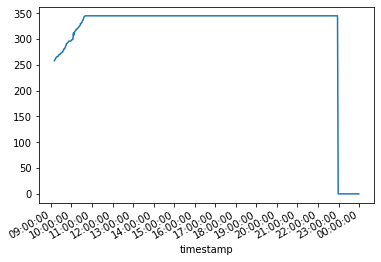

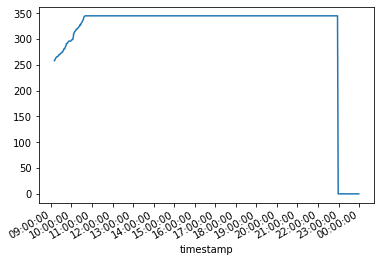

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')


with pd.plotting.plot_params.use('x_compat', True): 
  ax = only_277['total'].plot()
  ax.xaxis.set_major_locator(hours)
  ax.xaxis.set_major_formatter(h_fmt)

plt.show()

with pd.plotting.plot_params.use('x_compat', True): 
  ax = only_271['total'].plot()
  ax.xaxis.set_major_locator(hours)
  ax.xaxis.set_major_formatter(h_fmt)

plt.show()

with pd.plotting.plot_params.use('x_compat', True): 
  ax = only_283['total'].plot()
  ax.xaxis.set_major_locator(hours)
  ax.xaxis.set_major_formatter(h_fmt)

plt.show()